In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

# Загрузка предварительно обученной модели MobileNetV2
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False)

# Добавление слоев для детекции объектов
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
predictions = tf.keras.layers.Dense(4, activation='sigmoid')(x)  # Координаты объекта (x_min, y_min, x_max, y_max)

# Создание модели
model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

# Функция для детекции объектов на изображении
def detect_objects(image_path):
    # Загрузка изображения
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))  # Размер входного изображения для MobileNetV2

    # Подготовка изображения для модели
    image = image / 255.0
    image = np.expand_dims(image, axis=0)

    # Получение предсказаний от модели
    detections = model.predict(image)

    return detections

# Функция для отображения детекции объектов на изображении
def display_objects(image_path, detections):
    # Загрузка изображения
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Отображение детекции объектов
    x_min, y_min, x_max, y_max = detections[0]
    x_min, y_min, x_max, y_max = int(x_min * image.shape[1]), int(y_min * image.shape[0]), \
                                 int(x_max * image.shape[1]), int(y_max * image.shape[0])
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)

    # Отображение изображения с детекцией объектов
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis('off')
    plt.show()


9420800/9406464 [==============================] - 6s 1us/step


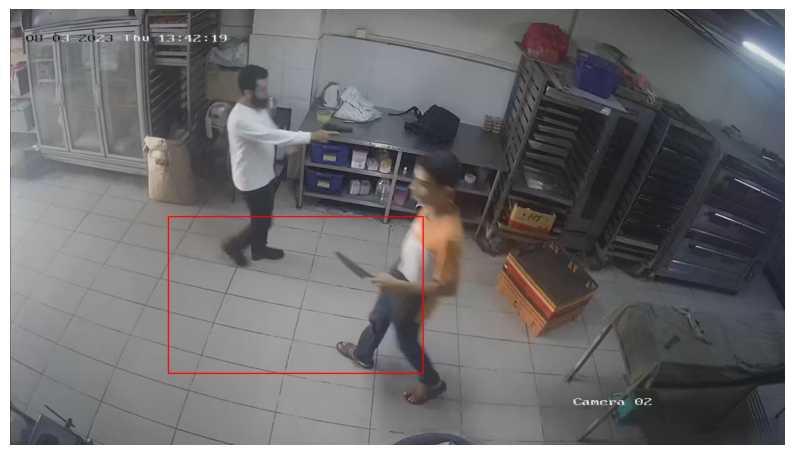

In [3]:
image_path = 'dataset\\data\\test\\images\\4a78bf4c-BDGK_C2_258_jpg.rf.f619f4d6082387c78faf2b7d87dfbc3d.jpg'
detections = detect_objects(image_path)
display_objects(image_path, detections)